,Unnamed: 0,bucket,cpu,gcl,population,gcl delta,cpu abnormal,cpu avg
count,1237.00000,1237.000000,1237.000000,1.237000e+03,1237.000000,1236.000000,60.000000,1138.000000
mean,618.00000,9783.597413,17.645159,7.836931e+06,13.967664,8.639968,191.527090,17.865945
std,357.23545,226.938887,41.883187,3.207717e+03,0.176963,4.689448,60.372516,1.017247
min,0.00000,9388.000000,3.454095,7.831392e+06,13.000000,0.000000,54.682624,13.809708
25%,309.00000,9606.000000,5.784045,7.833984e+06,14.000000,5.000000,200.915661,17.306969
50%,618.00000,9787.000000,6.545809,7.836938e+06,14.000000,8.000000,205.912203,17.786162
75%,927.00000,9999.000000,9.807278,7.839698e+06,14.000000,12.000000,223.620141,18.469053
max,1236.00000,11000.000000,279.223448,7.842071e+06,14.000000,21.000000,279.223448,22.593464


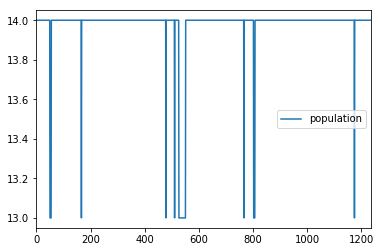

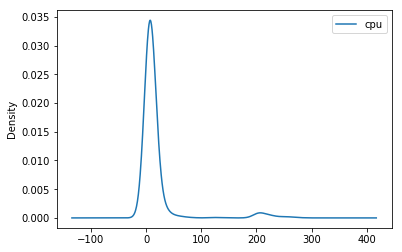

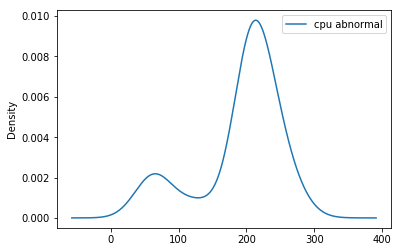

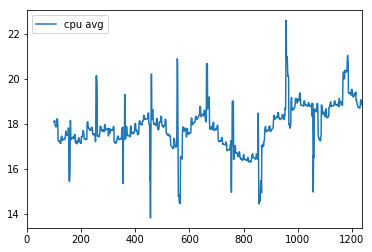

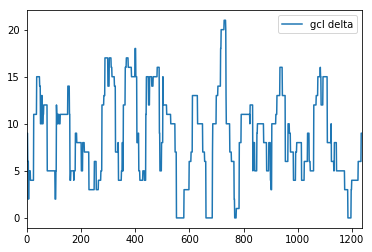

In [11]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = 0

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['cpu abnormal'] = df[df['cpu'] > 50]["cpu"]
df['cpu avg'] = df['cpu'].rolling(100).sum() / 100

df.plot(y="population")
df.plot.density(y="cpu")
df.plot.density(y="cpu abnormal")
df.plot(y="cpu avg")
df.plot(y="gcl delta")
df.describe()